In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

In [18]:
df = pd.read_csv('../data/world_happiness_2015_2023.csv')


In [19]:
colunas_usadas = [
    'economy_(gdp_per_capita)',
    'family',
    'health_(life_expectancy)',
    'freedom',
    'trust_(government_corruption)',
    'generosity',
    'dystopia_residual'
]
X = df[colunas_usadas]
y = df['happiness_score']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
model = LinearRegression()
model.fit(X_scaled, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:

y_pred = model.predict(X_scaled)
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", round(mse,4))
print("R^2:", round(r2,2))

MSE: 0.0
R^2: 1.0


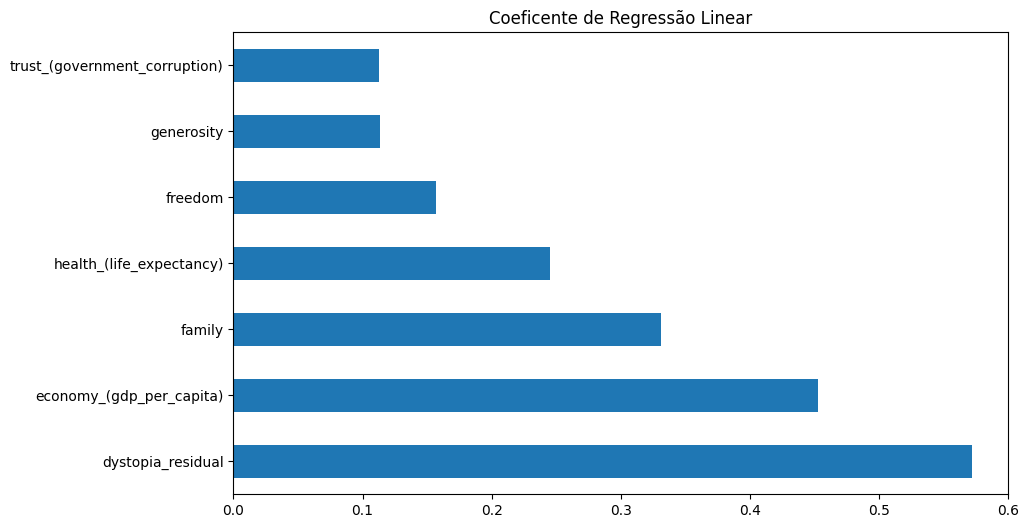

In [23]:
coef = pd.Series(model.coef_, index=X.columns)
coef.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title('Coeficente de Regressão Linear')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

In [43]:
latest_year_df = df.sort_values('year').groupby('country').tail(1)
clusters_paises = latest_year_df[['country', 'cluster']].sort_values(by='cluster')
print(clusters_paises)

                country  cluster
1107  Somaliland region        0
1106  Somaliland Region        0
126              Bhutan        0
1257       Turkmenistan        0
1038            Rwanda*        0
...                 ...      ...
121               Benin        4
1330          Venezuela        4
180        Burkina Faso        4
205            Cameroon        4
1365           Zimbabwe        4

[197 rows x 2 columns]


In [44]:
fig = px.scatter_3d(latest_year_df, x='economy_(gdp_per_capita)', y='health_(life_expectancy)',z='happiness_score',color='cluster',
                    hover_name='country', title='Relação entre PIB, Expectativa de Vida e Pontuação de Felicidade por Cluster',
                    labels={'economy_(gdp_per_capita)': 'PIB per Capita', 'health_(life_expectancy)': 'Expectativa de Vida',
                             'happiness_score': 'Pontuação de Felicidade'})
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(legend=dict(title='Cluster'))

fig


In [45]:
cluster_0 = latest_year_df[latest_year_df['cluster'] == 0]
cluster_1 = latest_year_df[latest_year_df['cluster'] == 1]
cluster_2 = latest_year_df[latest_year_df['cluster'] == 2]
cluster_3 = latest_year_df[latest_year_df['cluster'] == 3]
cluster_4 = latest_year_df[latest_year_df['cluster'] == 4]
print("Cluster 0 Countries:", cluster_0['country'].tolist())
print("Cluster 1 Countries:", cluster_1['country'].tolist())    
print("Cluster 2 Countries:", cluster_2['country'].tolist())
print("Cluster 3 Countries:", cluster_3['country'].tolist())
print("Cluster 4 Countries:", cluster_4['country'].tolist())

Cluster 0 Countries: ['Somaliland region', 'Somaliland Region', 'Bhutan', 'Turkmenistan', 'Rwanda', 'Turkmenistan*', 'Rwanda*', 'Bangladesh', 'Indonesia', 'India', 'Tanzania', 'Kenya', 'Laos', 'Ethiopia', 'Ukraine', 'Myanmar', 'Cambodia', 'Zambia']
Cluster 1 Countries: ['Oman', 'Hong Kong', 'Hong Kong S.A.R., China', 'Hong Kong SAR, China', 'Luxembourg*', 'Azerbaijan*', 'Australia', 'Austria', 'Ireland', 'Hong Kong S.A.R. of China', 'Iceland', 'Switzerland', 'Germany', 'Sweden', 'Estonia', 'Finland', 'France', 'Luxembourg', 'United Arab Emirates', 'Denmark', 'Netherlands', 'New Zealand', 'Canada', 'United Kingdom', 'Norway', 'Belgium', 'Singapore']
Cluster 2 Countries: ['Suriname', 'Puerto Rico', 'Taiwan', 'Trinidad & Tobago', 'Northern Cyprus', 'Belize', 'Qatar', 'Trinidad and Tobago', 'Azerbaijan', 'Kuwait', 'North Cyprus', 'Libya', 'Czech Republic', 'Maldives', 'North Cyprus*', 'Libya*', 'Kuwait*', 'Guatemala*', 'Argentina', 'Armenia', 'Bahrain', 'Uzbekistan', 'Romania', 'Russia', '

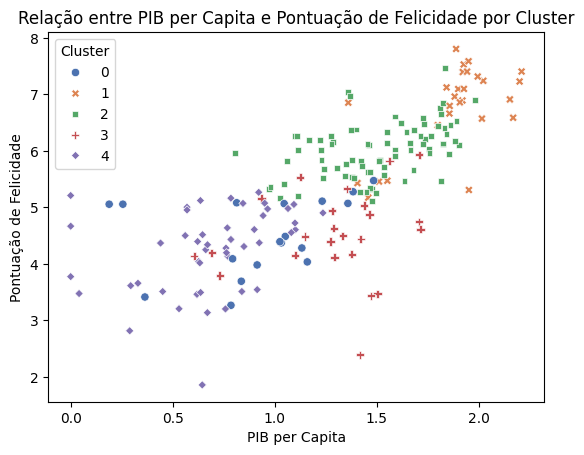

In [46]:
clusters_paises
sns.scatterplot(data=latest_year_df, x='economy_(gdp_per_capita)', y='happiness_score', hue='cluster', style='cluster', palette='deep')
plt.title('Relação entre PIB per Capita e Pontuação de Felicidade por Cluster')
plt.xlabel('PIB per Capita')    
plt.ylabel('Pontuação de Felicidade')
plt.legend(title='Cluster')
plt.show()

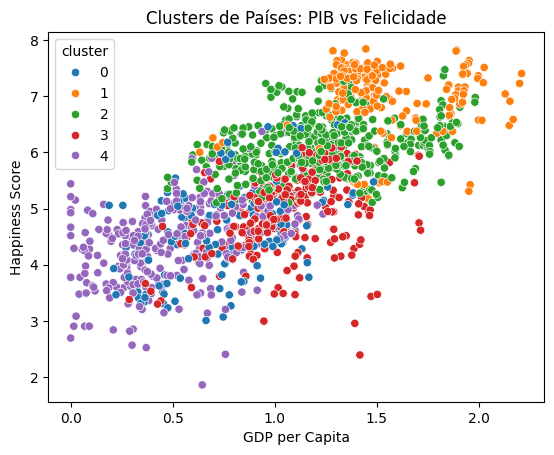

In [47]:
sns.scatterplot(data=df, x='economy_(gdp_per_capita)', y='happiness_score', hue='cluster', palette='tab10')
plt.title("Clusters de Países: PIB vs Felicidade")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

In [48]:
cluster_stats = df.groupby('cluster')['happiness_score'].mean().sort_values(ascending=False)
print("Média de felicidade por cluster:")
print(cluster_stats)

Média de felicidade por cluster:
cluster
1    7.016573
2    6.078422
3    4.930611
0    4.692879
4    4.376611
Name: happiness_score, dtype: float64
